In [5]:
# Barycenter with GW and CTtil

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import networkx as nx
import numpy as np
from fgw.dist import calc_T, commute_time, cttil_Z
from scipy.optimize import linesearch, minimize, approx_fprime
from fgw.cttil_bary import grad_C_T, grad_T_Z, optimize_Z, solve_A_from_Z, optimize_Z_v2
# from fgw.gwtil_bary import solve_A_from_Z, optimize_Z
from fgw.data_loader import build_noisy_circular_graph
from fgw.utils import generate_graph
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
np.random.seed(0)


In [8]:
# np.random.randint(15, 25)
Gs = [build_noisy_circular_graph(4,
                                 with_noise=False,
                                 structure_noise=True,
                                 p=3) for _ in range(1)]
# Gs = [generate_graph(np.random.randint(15, 25), 2, g_type="path")]
N = 5

Ls = [nx.laplacian_matrix(g.nx_graph) for g in Gs]
Zs = [np.linalg.inv(Ls[i] + np.ones(Ls[i].shape) / Ls[i].shape[0]) for i in range(len(Ls))]
Ds = [cttil_Z(z) for z in Zs]
ps = [np.ones(Ls[i].shape[0]) / Ls[i].shape[0] for i in range(len(Ls))]
lambdas = np.ones(len(Gs)) / len(Gs)
p = np.ones(N) / N


In [9]:
from ot.gromov import gromov_barycenters
C = gromov_barycenters(N, Ds, ps, p, lambdas, "square_loss")

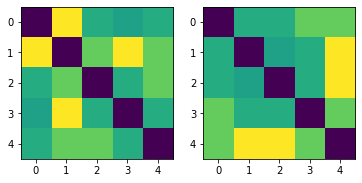

In [10]:
plt.subplot(1,2,1)
plt.imshow(C)
plt.subplot(1,2,2)
plt.imshow(Ds[0])

In [11]:
Z_opt = optimize_Z_v2(N, Ds, Zs, ps, p, lambdas)


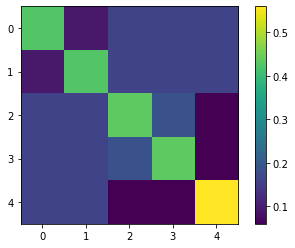

In [12]:
Z_opt.min(), Z_opt.max()
plt.imshow(Z_opt)
plt.colorbar()


(-1.000000000000005, 3.0000000000000013, 4.440892098500626e-16)

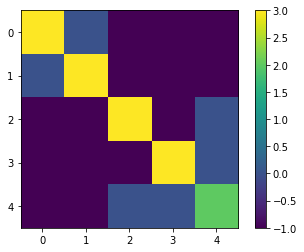

In [13]:
L = np.linalg.pinv(Z_opt) - np.ones((N, N)) / N
plt.imshow(L)
plt.colorbar()
(L.min(), L.max(), L.sum())


In [14]:
_A = solve_A_from_Z(Z_opt)
_A.min(), _A.max()


(0, 1)

(0, 1)

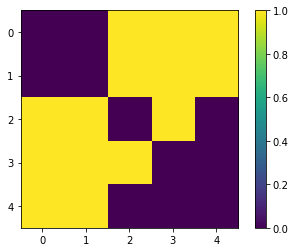

In [15]:
from fgw.cttil_bary import solve_A_from_Z
A = solve_A_from_Z(Z_opt)
plt.imshow(A)
plt.colorbar()
A.min(), A.max()

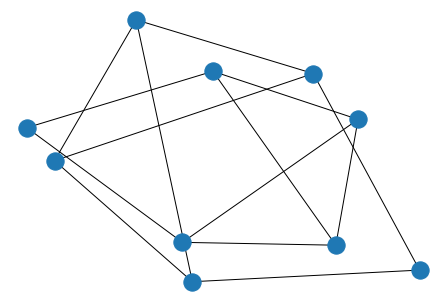

In [16]:
# A = np.fix(A).astype(int)
# print(A)
G = nx.from_numpy_array(A)
nx.draw(G, pos=nx.kamada_kawai_layout(G))
nx.draw(Gs[0].nx_graph)


IndexError: list index out of range

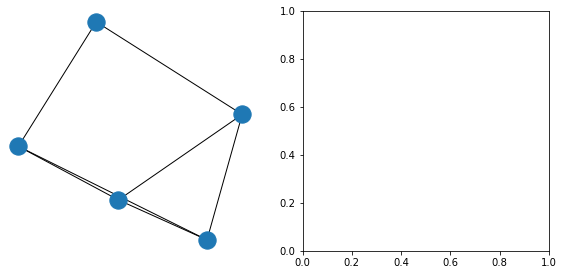

In [17]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3, i+1)
    nx.draw(Gs[i].nx_graph)

In [ ]:
Z_opt = np.asarray(Z_opt)
L = np.linalg.inv(Z_opt) - np.ones(Z_opt.shape) / N
L_ = np.copy(L)
np.fill_diagonal(L_, 0)
L_min, L_max = L_.min(), L_.max()
L = (L - L_min)/(L_max - L_min)
np.fill_diagonal(L, 0)
plt.imshow(L)
plt.colorbar()
L

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(Z_opt)
plt.title("opt Z")
plt.colorbar()

A_opt = solve_A_from_Z(Z_opt)
# REVIEW: rounding issue
# A_opt = np.fix(np.round(A_opt - A_opt.min())).astype(int)
# A_opt = np.round(A_opt)
# A_opt = line_search(A_opt - A_opt.min(), A_opt.min(), A_opt.max())
print(A_opt)
plt.subplot(1, 3, 2)
plt.imshow(A_opt)
plt.title("opt A before rounding")
plt.colorbar()

# A_opt = np.fix(np.round(A_opt)).astype(int)
# A_opt = np.fix(np.round(A_opt - A_opt.min(1))).astype(int)
plt.subplot(1, 3, 3)
plt.imshow(A_opt)
plt.colorbar()
plt.title("opt A after rounding")
plt.tight_layout()
plt.show()

# print(A_opt)

G_ = nx.from_numpy_array(A_opt)
fig = plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
nx.draw(Gs[0].nx_graph, nx.kamada_kawai_layout(Gs[0].nx_graph))
plt.title("Original")
plt.subplot(1, 2, 2)
nx.draw(G_, nx.kamada_kawai_layout(G_))
plt.title("Barycenter")
plt.tight_layout()
plt.show()
